# Classifications : The Ultimate Notebook

### Imports

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn import metrics

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### The Dataset

In [3]:
df = pd.read_csv("multiclass.csv", low_memory=True, sep=",")

In [6]:
display(df)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## 1) autosklearn Classification

In [7]:
import autosklearn.classification

y=df['fetal_health']
X=df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task = 30, ensemble_size=1)
automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)

print(automl.show_models())
print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.5, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 2, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, 'data_preprocessing:categorical_tran

In [57]:
# résumé du processus
print(automl.sprint_statistics())

# probas d'appartenance pour les classifiers
display(automl.predict_proba(X))

auto-sklearn results:
  Dataset name: e879374e-a486-11eb-9c02-faffc20d003d
  Metric: accuracy
  Best validation score: 0.912602
  Number of target algorithm runs: 6
  Number of successful target algorithm runs: 3
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



array([[0.10742188, 0.79492188, 0.09765625],
       [0.99414062, 0.00585938, 0.        ],
       [0.99804688, 0.00195312, 0.        ],
       ...,
       [0.09570312, 0.890625  , 0.01367188],
       [0.09765625, 0.89453125, 0.0078125 ],
       [0.79101562, 0.18945312, 0.01953125]])

## 2) Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

y=df['fetal_health']
X=df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# display("y_test", y_test)

# display("y_pred", y_pred)

# print(type(y_test))
# print(type(y_pred))

                            


print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
# print("ROC:",roc_auc_score(y_test, y_pred, multi_class="ovo"))
print("------------------------------------------------------")

#print("AUC:", roc_auc_score(y_test, y_pred, multi_class="ovr"))

------------------------------------------------------
Accuracy: 0.9012539184952978
------------------------------------------------------
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       497
         2.0       0.70      0.68      0.69        88
         3.0       0.74      0.79      0.76        53

    accuracy                           0.90       638
   macro avg       0.80      0.81      0.80       638
weighted avg       0.90      0.90      0.90       638

------------------------------------------------------
MCC: 0.7328966686454467
------------------------------------------------------
Kappa: 0.7328237170965168
------------------------------------------------------


## 3) k-NN (k-Nearest Neighbors)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

y=df['fetal_health']
X=df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

for k in range(1,6):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("For K =",k)
    print("Accuracy: ",accuracy_score(y_test, y_pred))
    print("MCC: ",matthews_corrcoef(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

------------------------------------------------------
For K = 1
Accuracy:  0.8934169278996865
MCC:  0.7112814873825886
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       497
         2.0       0.65      0.68      0.67        88
         3.0       0.86      0.83      0.85        53

    accuracy                           0.89       638
   macro avg       0.82      0.82      0.82       638
weighted avg       0.89      0.89      0.89       638

Confusion Matrix
[[466  27   4]
 [ 25  60   3]
 [  4   5  44]]
------------------------------------------------------
For K = 2
Accuracy:  0.890282131661442
MCC:  0.6826662639942674
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94       497
         2.0       0.71      0.57      0.63        88
         3.0       0.89      0.75      0.82        53

    accuracy                           0.89       638
   macro avg       0.84      0.76      0.80  

## 4) Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

y=df['fetal_health']
X=df.drop("fetal_health", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

for k in (1,5,10,20,100):
    model=RandomForestClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("------------------------------------------------------")
    print("For K =",k)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("MCC:",matthews_corrcoef(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

------------------------------------------------------
For K = 1
Accuracy: 0.9043887147335423
MCC: 0.7318692603536489
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.74      0.65      0.69        88
         3.0       0.79      0.77      0.78        53

    accuracy                           0.90       638
   macro avg       0.82      0.80      0.81       638
weighted avg       0.90      0.90      0.90       638

Confusion Matrix
[[479  14   4]
 [ 24  57   7]
 [  6   6  41]]
------------------------------------------------------
For K = 5
Accuracy: 0.9184952978056427
MCC: 0.765967398612643
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       497
         2.0       0.79      0.65      0.71        88
         3.0       0.95      0.77      0.85        53

    accuracy                           0.92       638
   macro avg       0.89      0.80      0.84      

## 5) Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

y=df['fetal_health']
X=df.drop("fetal_health", axis=1)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

model=GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("MCC:",matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

------------------------------------------------------
Accuracy: 0.9529780564263323
MCC: 0.8692508463647365
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       497
         2.0       0.89      0.77      0.83        88
         3.0       0.94      0.96      0.95        53

    accuracy                           0.95       638
   macro avg       0.93      0.91      0.92       638
weighted avg       0.95      0.95      0.95       638

Confusion Matrix
[[489   7   1]
 [ 18  68   2]
 [  1   1  51]]


# Binary Classifier

In [4]:
df2 = pd.read_csv("binary.csv", low_memory=True, sep=",")

In [5]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


------------------------------------------------------
Accuracy: 0.8021978021978022
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

------------------------------------------------------
MCC: 0.5993577542022798
------------------------------------------------------
Kappa: 0.5969488188976377
------------------------------------------------------
 
AUC: 0.7958536585365853


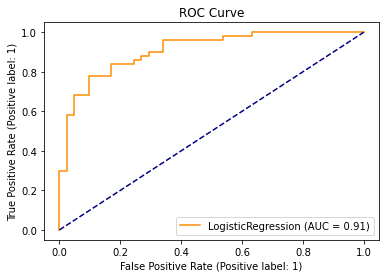

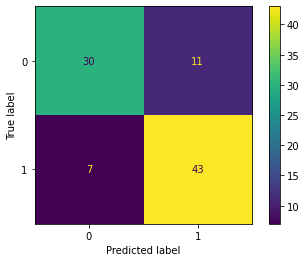

In [6]:
from sklearn.linear_model import LogisticRegression

y=df2['target']
X=df2.drop("target", axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("------------------------------------------------------")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("------------------------------------------------------")
print("MCC:",matthews_corrcoef(y_test, y_pred))
print("------------------------------------------------------")
print("Kappa:",cohen_kappa_score(y_test, y_pred))
print("------------------------------------------------------")
print(" ")


metrics.plot_roc_curve(model, X_test, y_test, color='darkorange')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
print("AUC:", roc_auc_score(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

In [1]:
#testgithub